# **Cat vs Dogs With Augmentation dataset**
https://www.kaggle.com/competitions/dogs-vs-cats/data


In [1]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 12s (36.1 MB/s)
(Reading database ... 155685 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155663 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+

## Download and Inspect the dataset

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-05 14:03:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   179MB/s    in 0.4s    

2022-09-05 14:03:07 (179 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile
zipfile_path= '/content/cats_and_dogs_filtered.zip'
zip_ref= zipfile.ZipFile(zipfile_path, 'r')
zip_ref.extractall()
zip_ref.close()

his module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

In [4]:
import os
base_directory= 'cats_and_dogs_filtered'

print('Base directory content:')
print(os.listdir(base_directory))

Base directory content:
['validation', 'vectorize.py', 'train']


In [5]:
print('Base directory content:')
print(os.listdir(f'{base_directory}/train'))

print('Base directory ci=ontent:')
print(os.listdir(f'{base_directory}/validation'))

Base directory content:
['cats', 'dogs']
Base directory ci=ontent:
['cats', 'dogs']


In [6]:
# Train and validation directories
train_directory= os.path.join(base_directory, 'train')
validation_directory=os.path.join(base_directory, 'validation')

# Directory with trainig cats and dogs pictures
train_cats_dir = os.path.join(train_directory, 'cats')
train_dogs_dir = os.path.join(train_directory, 'dogs')

#Directory with trainig cats and dogs pictures
validation_cats_dir = os.path.join(validation_directory, 'cats')
validation_dogs_dir = os.path.join(validation_directory, 'dogs')

In [7]:
# the name of each image in the directory
train_cats_fname= os.listdir(train_cats_dir)
print(f'the names of cats are: {train_cats_fname[:10]}')

train_dogs_fname= os.listdir(train_dogs_dir)
print(f'the names of dogs are: {train_dogs_fname[:10]}')


the names of cats are: ['cat.691.jpg', 'cat.992.jpg', 'cat.429.jpg', 'cat.442.jpg', 'cat.772.jpg', 'cat.560.jpg', 'cat.47.jpg', 'cat.680.jpg', 'cat.129.jpg', 'cat.118.jpg']
the names of dogs are: ['dog.398.jpg', 'dog.501.jpg', 'dog.357.jpg', 'dog.795.jpg', 'dog.667.jpg', 'dog.885.jpg', 'dog.597.jpg', 'dog.981.jpg', 'dog.149.jpg', 'dog.503.jpg']


In [8]:
print(f'total training cats images: {len(train_cats_fname)}')
print(f'total training dogs images: {len(train_dogs_fname)}')
print()
print(f'total validation cats images: {len(os.listdir(validation_cats_dir))}')
print(f'total validation dogs images: {len(os.listdir(validation_dogs_dir))}')

total training cats images: 1000
total training dogs images: 1000

total validation cats images: 500
total validation dogs images: 500


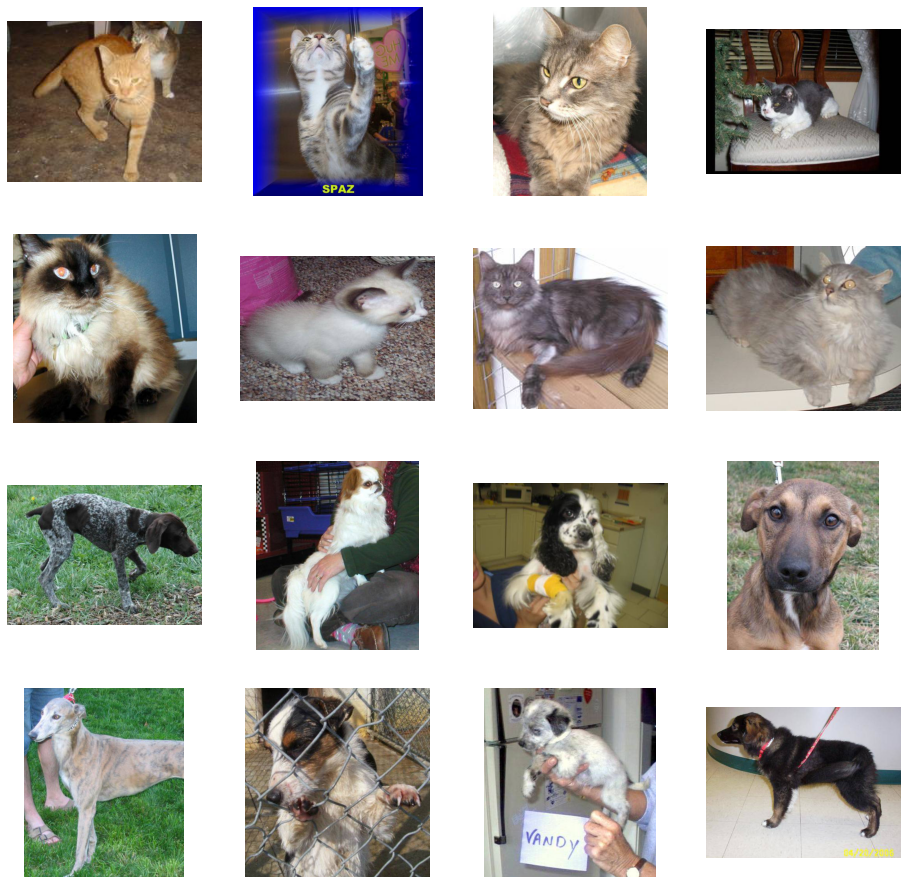

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

nrows=4
ncolumns=4
pic_index=0

fig= plt.gcf()
fig.set_size_inches(nrows*4, ncolumns*4)
pic_index += 8

#iterate on the cats images to print the first 8 cats
next_cat_pix=[os.path.join(train_cats_dir, fname) for fname in train_cats_fname[pic_index - 8 : pic_index]]

#iterate on the dogs images to print the first 8 cats
next_dog_pix=[os.path.join(train_dogs_dir, fname) for fname in train_dogs_fname[pic_index - 8 : pic_index]]

# From the previous two lines of code we have made a two vectors that contain the name of first 8 cates 
# and dogs separately to be able to print then when iterating on the two vectors in the next for loop

for i , img_path in enumerate (next_cat_pix + next_dog_pix):
  sp= plt.subplot(nrows, ncolumns, i+1)
  sp.axis('off')  # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# **Building the model**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop


def create_model():
  model = keras.Sequential([
      # First Layer
      keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
      keras.layers.MaxPooling2D(2,2),
      # Second Layer
      keras.layers.Conv2D(32,(3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      # Third Layer
      keras.layers.Conv2D(64, (3,3), activation= 'relu'),
      keras.layers.MaxPooling2D(2,2),

      # Flatten Layer
      keras.layers.Flatten(),
      keras.layers.Dense(512, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer= RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics= ['accuracy'])
  
  return model

## **Data Preprocessing**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=(1.0/255.0))
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                     batch_size = 20,
                                                     class_mode = 'binary',
                                                     target_size = (150,150))

validation_generator = validation_datagen.flow_from_directory(validation_directory,
                                                     batch_size = 20,
                                                     class_mode = 'binary',
                                                     target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
model = create_model()
history = model.fit(
            train_generator,
            steps_per_epoch = 100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps = 50
            )

Epoch 1/15
100/100 [==============================] - 15s 96ms/step - loss: 0.7007 - accuracy: 0.5785 - val_loss: 0.6721 - val_accuracy: 0.5800
Epoch 2/15
100/100 [==============================] - 9s 85ms/step - loss: 0.6240 - accuracy: 0.6690 - val_loss: 0.6363 - val_accuracy: 0.6420
Epoch 3/15
100/100 [==============================] - 9s 85ms/step - loss: 0.5630 - accuracy: 0.7235 - val_loss: 0.5997 - val_accuracy: 0.6760
Epoch 4/15
100/100 [==============================] - 9s 86ms/step - loss: 0.4697 - accuracy: 0.7795 - val_loss: 0.6007 - val_accuracy: 0.7000
Epoch 5/15
100/100 [==============================] - 9s 85ms/step - loss: 0.3807 - accuracy: 0.8275 - val_loss: 0.6121 - val_accuracy: 0.7030
Epoch 6/15
100/100 [==============================] - 9s 85ms/step - loss: 0.2951 - accuracy: 0.8785 - val_loss: 0.6543 - val_accuracy: 0.7210
Epoch 7/15
100/100 [==============================] - 9s 85ms/step - loss: 0.2192 - accuracy: 0.9120 - val_loss: 0.7704 - val_accuracy: 0.719

## **Evaluating Accuracy and Loss for the Model**

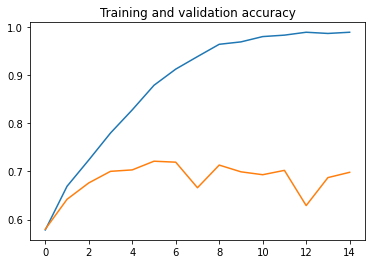

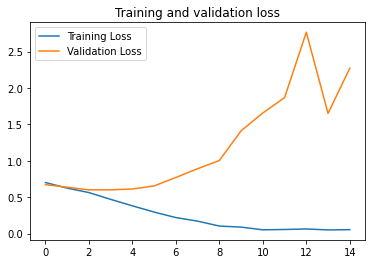

In [14]:
def plot_model(history):
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]

  epochs   = range(len(acc)) # Get number of epochs

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.title ('Training and validation accuracy')
  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_model(history)

the model is overfitting like it's getting out of fashion. The training accuracy (in blue) gets more than 90% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

## **Data Augmentation**

In [15]:
model_for_aug = create_model()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_directory,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_directory,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 18s 169ms/step - loss: 0.7756 - accuracy: 0.5250 - val_loss: 0.6856 - val_accuracy: 0.5550
Epoch 2/20
100/100 [==============================] - 17s 173ms/step - loss: 0.6810 - accuracy: 0.5955 - val_loss: 0.6608 - val_accuracy: 0.6170
Epoch 3/20
100/100 [==============================] - 17s 169ms/step - loss: 0.6642 - accuracy: 0.6215 - val_loss: 0.6316 - val_accuracy: 0.6250
Epoch 4/20
100/100 [==============================] - 17s 167ms/step - loss: 0.6356 - accuracy: 0.6490 - val_loss: 0.6114 - val_accuracy: 0.6550
Epoch 5/20
100/100 [==============================] - 17s 167ms/step - loss: 0.6256 - accuracy: 0.6640 - val_loss: 0.5991 - val_accuracy: 0.6670
Epoch 6/20
100/100 [==============================] - 17s 167ms/step - loss: 0.6174 - accuracy: 0.6680 - val_loss: 0.6600 - val_accuracy: 0.6200
Epoch 7/20
100/100 [==========================

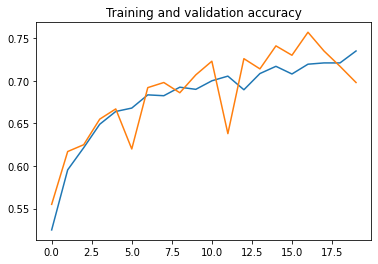

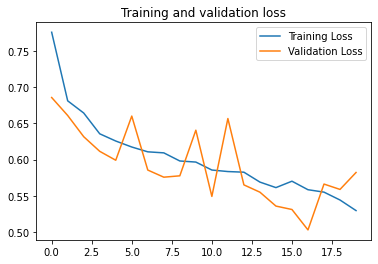

In [16]:
plot_model(history_with_aug)

# **Clean Up**

In [ ]:
import os, signal

os.kill(os.getpid() , signal.SIGKILL)